In [2]:
import scanpy as sc
import os
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
import scipy.io

sc.settings.verbosity = 3

Download he files from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE118614 into `../data/GSE118614`.


GSE118614_10x_aggregate.mtx.gz -> matrix.mtx.gz

GSE118614_barcodes.tsv.gz -> barcodes.tsv.gz

GSE118614_genes.tsv.gz -> genes.tsv.gz

In [3]:
cache_file = "../data/GSE118614/gse118614_raw.h5ad"
if os.path.exists(cache_file):
    adata = sc.read_h5ad(cache_file)
else:
    from scipy.sparse import csr_matrix
    mtx = sp.io.mmread("../data/GSE118614/matrix.mtx.gz")
    genes = pd.read_csv("../data/GSE118614/genes.tsv.gz", sep='\t')
    cells = pd.read_csv("../data/GSE118614/barcodes.tsv.gz", sep='\t')
    adata = sc.AnnData(mtx, cells, genes)
    adata.X = csr_matrix(adata.X)
    adata.write(cache_file)

In [5]:
adata.var.index = adata.var.gene_short_name.tolist()
adata.var_names_make_unique()

In [6]:
adata.obs

,barcode,sample,age,num_genes_expressed,Total_mRNAs,umap_cluster,umap_coord1,umap_coord2,umap_coord3,used_for_pseudotime,umap2_CellType
E11.AAACCTGAGATGTAAC.1,E11.AAACCTGAGATGTAAC-1,E11,E11,1549,2794,130,3.581455,-4.245770,-3.752502,False,Early RPCs
E11.AAACCTGAGCCCAGCT.1,E11.AAACCTGAGCCCAGCT-1,E11,E11,1889,11600,144,10.760842,1.156191,0.558124,False,Red Blood Cells
E11.AAACCTGAGGCAATTA.1,E11.AAACCTGAGGCAATTA-1,E11,E11,1848,3548,103,2.634151,-5.016846,-3.926956,False,Early RPCs
E11.AAACCTGAGTAGCGGT.1,E11.AAACCTGAGTAGCGGT-1,E11,E11,1935,3838,130,3.268848,-3.967177,-3.942664,False,Early RPCs
E11.AAACCTGAGTGGAGTC.1,E11.AAACCTGAGTGGAGTC-1,E11,E11,2139,4612,115,3.737625,-4.926516,-4.012058,True,Early RPCs
...,...,...,...,...,...,...,...,...,...,...,...
P8_rep2.TTTGTCACAACCGCCA.1,P8_rep2.TTTGTCACAACCGCCA-1,P8_rep2,P8,406,525,107,1.441268,5.090573,1.679778,True,Bipolar Cells
P8_rep2.TTTGTCACAGGATTGG.1,P8_rep2.TTTGTCACAGGATTGG-1,P8_rep2,P8,440,553,84,-0.933211,6.210865,0.584979,True,Rods
P8_rep2.TTTGTCAGTCGGCTCA.1,P8_rep2.TTTGTCAGTCGGCTCA-1,P8_rep2,P8,550,721,107,1.745962,5.059008,1.633069,False,Bipolar Cells
P8_rep2.TTTGTCATCGCTTAGA.1,P8_rep2.TTTGTCATCGCTTAGA-1,P8_rep2,P8,579,748,107,1.188123,5.120153,1.959507,True,Bipolar Cells


In [7]:
def str2num_age(x):
    if x[0] == 'P':
        return float(x[1:])
    if x[0] == 'E':
        return float(x[1:]) - 20
adata.obs['numerical_age'] = adata.obs.age.apply(str2num_age)

In [8]:
adata.obs['numerical_age'].value_counts()

-6.0    26944
-2.0    23011
2.0     17963
8.0     11727
0.0      9925
-9.0     9364
14.0     8103
5.0      6756
-4.0     5401
-8.0     1610
Name: numerical_age, dtype: int64

normalizing counts per cell
    finished (0:00:01)


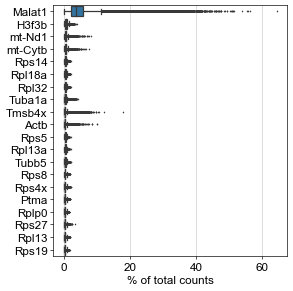

In [9]:
sc.settings.set_figure_params(dpi=60, facecolor='white')
sc.pl.highest_expr_genes(adata, n_top=20)

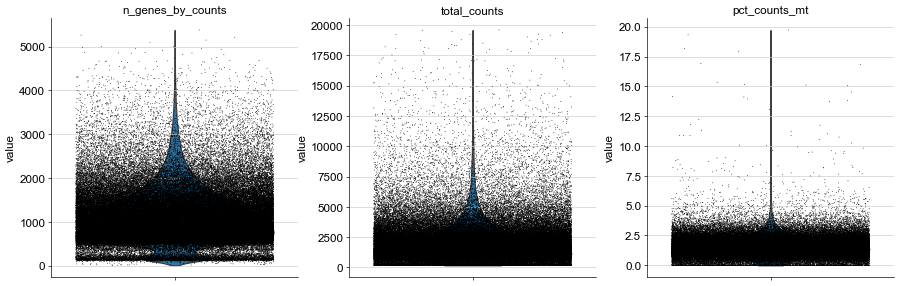

In [10]:
adata.var['mt'] = adata.var.index.str.startswith('mt-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'], jitter=0.4, multi_panel=True)

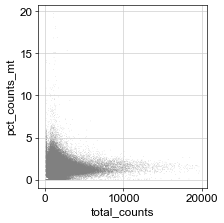

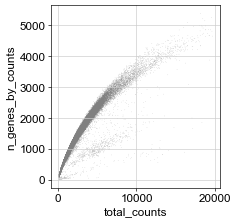

In [11]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [12]:
adata = adata[(adata.obs.n_genes_by_counts > 400) & (adata.obs.n_genes_by_counts < 5000) & (adata.obs.pct_counts_mt < 4.0), :]

In [13]:
adata = adata[~adata.obs.umap2_CellType.isin(['Red Blood Cells', 'Doublets'])]

In [14]:
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)

C:\Users\SLiang3\Miniconda3\envs\scanpy38\lib\site-packages\scanpy\preprocessing\_normalization.py:138: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
normalizing counts per cell
    finished (0:00:00)


extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


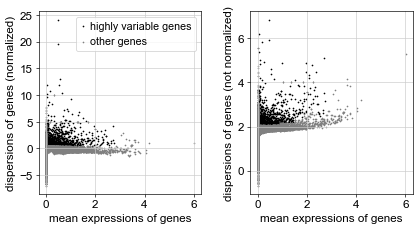

In [15]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(adata)

In [16]:
adata.var.highly_variable.sum()

1672

In [17]:
adata.raw = adata

In [18]:
adata = adata[:, adata.var.highly_variable]

In [19]:
# sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

In [20]:
sc.pp.scale(adata, max_value=10)

C:\Users\SLiang3\Miniconda3\envs\scanpy38\lib\site-packages\scanpy\preprocessing\_simple.py:845: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)
... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [21]:
adata

AnnData object with n_obs × n_vars = 102102 × 1672
    obs: 'barcode', 'sample', 'age', 'num_genes_expressed', 'Total_mRNAs', 'umap_cluster', 'umap_coord1', 'umap_coord2', 'umap_coord3', 'used_for_pseudotime', 'umap2_CellType', 'numerical_age', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'id', 'gene_short_name', 'num_cells_expressed', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [22]:
adata.obs.to_csv("gse118614.csv")

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:12)


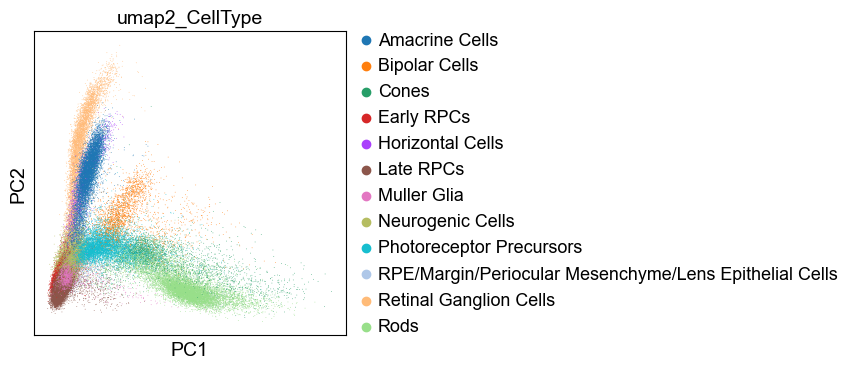

In [23]:
sc.settings.set_figure_params(dpi=100, facecolor='white')
sc.tl.pca(adata, svd_solver='arpack')
sc.pl.pca(adata, color='umap2_CellType')

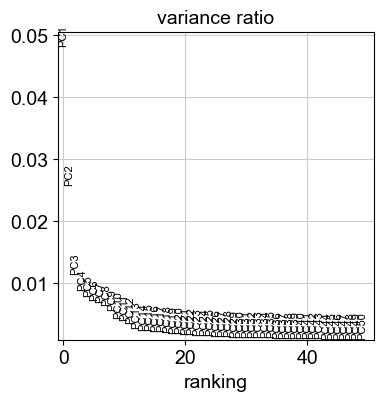

In [24]:
sc.pl.pca_variance_ratio(adata, log=False, n_pcs=50)

In [25]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=14, metric='cosine')

computing neighbors
    using 'X_pca' with n_pcs = 14
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:35)


In [26]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:04)


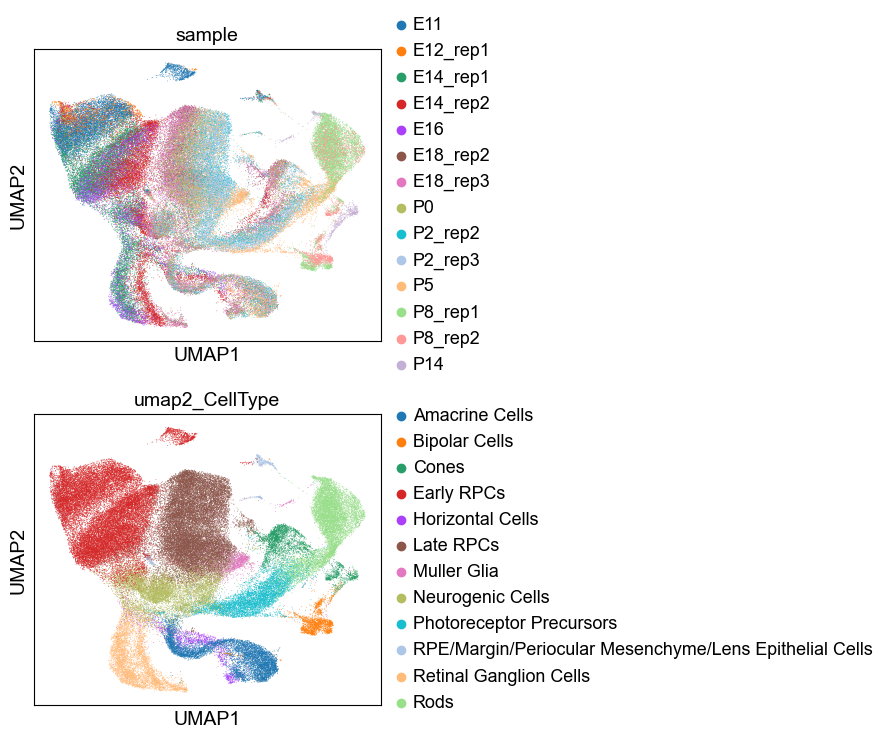

In [27]:
sc.pl.umap(adata, color=['sample', 'umap2_CellType'], ncols=1)